### Simulations for the mean

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scanpy as sc
import scipy as sp
import scipy.sparse as sparse
import itertools
import numpy as np
import scipy.stats as stats
from scipy.special import kl_div
from scipy.integrate import dblquad
import seaborn as sns
from statsmodels.stats.multitest import fdrcorrection
import imp
pd.options.display.max_rows = 999
pd.set_option('display.max_colwidth', 100)
import pickle as pkl
import time

/tmp/ipykernel_2707/1976549207.py:13: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  import imp


In [2]:
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

import matplotlib.pylab as pylab
params = {'legend.fontsize': 'small',
         'axes.labelsize': 'medium',
         'axes.titlesize':'medium',
         'figure.titlesize':'medium',
         'xtick.labelsize':'medium',
         'ytick.labelsize':'medium'}
pylab.rcParams.update(params)


In [3]:
import sys
sys.path.append('/home/ubuntu/Github/memento/')
import memento
import memento.auxillary.simulate as simulate

In [4]:
data_path = '/home/ubuntu/Data/'

In [5]:
%load_ext autoreload

In [6]:
%autoreload 2

### Plotting

In [26]:
def concordance(x, y, log=True):
    
    if log:
        a = np.log(x)
        b = np.log(y)
    else:
        a = x
        b = y
    cond = np.isfinite(a) & np.isfinite(b)
    a = a[cond]
    b = b[cond]
    cmat = np.cov(a, b)
    return 2*cmat[0,1]/(cmat[0,0] + cmat[1,1] + (a.mean()-b.mean())**2)

In [32]:
means = np.load(data_path + 'simulation/mean/simulation_means.npz')['means']
meta = pd.read_csv(data_path + 'simulation/mean/simulation_metadata.csv')
results = meta.iloc[1:].copy()

In [33]:
concordances = []
for i in range(1, means.shape[0]):
    
    c = concordance(means[0], means[i])
    concordances.append(c)
results['concordance'] = concordances

/tmp/ipykernel_2707/3688686602.py:5: RuntimeWarning: divide by zero encountered in log
  b = np.log(y)


In [65]:
num_cell_to_show = [10, 40, 100]
methods_to_show = ['naive', 'hypergeometric']
q_limit = 0.4
results_to_show = results\
    .query('num_cell in @num_cell_to_show')\
    .query('method in @methods_to_show')\
    .query(f'q < {q_limit}')\
    .sort_values('num_cell', ascending=False)

In [73]:
colors = ['turquoise', 'silver']

<Axes: xlabel='q', ylabel='concordance'>

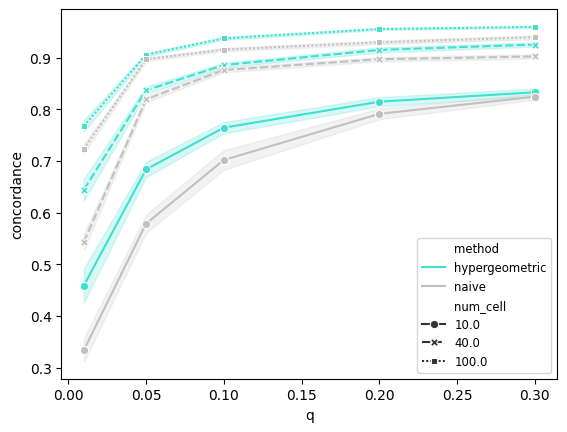

In [78]:
sns.lineplot(
    x="q", 
    y="concordance",
    hue="method",
    style='num_cell', data=results_to_show,
    palette=colors,
    markers=True,
    errorbar=('sd', 2))

In [34]:
results

,q,num_cell,trial,method,concordance
1,0.01,10.0,1,naive,0.325254
2,0.01,10.0,1,pb,0.325553
3,0.01,10.0,1,hypergeometric,0.452417
4,0.01,10.0,2,naive,0.350105
5,0.01,10.0,2,pb,0.349514
...,...,...,...,...,...
3836,1.00,500.0,19,pb,0.992010
3837,1.00,500.0,19,hypergeometric,0.992010
3838,1.00,500.0,20,naive,0.992118
3839,1.00,500.0,20,pb,0.992157


In [28]:
concordances

[0.32525444533741477,
 0.3255532901899857,
 0.4524169571577815,
 0.35010547693200633,
 0.34951405485203574,
 0.48982539717282225,
 0.33251508321323886,
 0.33325943552867693,
 0.4548633629670926,
 0.3509681943785235,
 0.3512208075821515,
 0.4756981270486527,
 0.32438000300690434,
 0.3250457962318791,
 0.44256042931689954,
 0.34056162302919346,
 0.33988191965118636,
 0.47134293192786086,
 0.3187793454906486,
 0.31963735706684715,
 0.4506901718977556,
 0.3378928341820162,
 0.33748282941322794,
 0.45667034018909564,
 0.3263894758202099,
 0.3258224908784911,
 0.4554764632219276,
 0.339290021320833,
 0.33962275495865996,
 0.44859448663374457,
 0.33249476585210425,
 0.3313032931096809,
 0.43547056923258093,
 0.356632132097369,
 0.3584348195530507,
 0.4804757361014777,
 0.34302461380123417,
 0.3440474958480855,
 0.4699585283986948,
 0.3444249235218742,
 0.3457729112909999,
 0.47211313806995214,
 0.3373173173428271,
 0.3370487485695398,
 0.45565171131255133,
 0.32146673298040085,
 0.32161358309

In [17]:
a.files

['means']

In [18]:
a['means']

array([[7.19573363e-05, 1.05128984e-05, 1.98560825e-04, ...,
        1.89698767e-05, 2.13900948e-05, 2.21303402e-04],
       [7.77322141e-05, 0.00000000e+00, 3.94011032e-05, ...,
        4.11522634e-05, 5.93824228e-05, 2.22059233e-04],
       [8.02053256e-05, 0.00000000e+00, 4.01026628e-05, ...,
        4.01026628e-05, 6.01539942e-05, 2.20564645e-04],
       ...,
       [4.05563622e-05, 0.00000000e+00, 1.27108352e-04, ...,
        0.00000000e+00, 6.29326621e-05, 1.67290736e-04],
       [4.13129247e-05, 0.00000000e+00, 1.23938774e-04, ...,
        0.00000000e+00, 6.19693871e-05, 1.65251699e-04],
       [3.80250449e-05, 1.62765821e-05, 1.23938774e-04, ...,
        1.62765821e-05, 5.83972169e-05, 1.65251699e-04]])

### Extract parameters from interferon dataset

In [21]:
adata = sc.read(data_path + 'interferon_filtered.h5ad')
adata = adata[adata.obs.cell_type == 'CD4 T cells - ctrl']
data = adata.X.copy()
relative_data = data.toarray()/data.sum(axis=1)

/home/ubuntu/anaconda3/envs/mementocxg/lib/python3.11/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


In [22]:
q = 0.07
x_param, z_param, Nc, good_idx = simulate.extract_parameters(adata.X, q=0.07, min_mean=0.001)

In [23]:
n_cells=500
n_genes = x_param[0].shape[0]

In [24]:
true_data = simulate.simulate_transcriptomes(n_cells=n_cells, means=z_param[0], variances=z_param[1], Nc=Nc, norm_cov='uncorrelated')
qs, captured_data = simulate.capture_sampling(true_data, 0.1, None)
captured_data = captured_data[captured_data.sum(axis=1) > 0, :]
size_factor = captured_data.sum(axis=1)
naive_m = (captured_data/size_factor.reshape(-1,1)).mean(axis=0)
pb_m = captured_data.sum(axis=0)/captured_data.sum()

captured_data = sparse.csr_matrix(captured_data)


### OOP Good implementation

In [25]:
est = memento.estimator.RNAHypergeometric()


In [28]:
est.mean(captured_data, size_factor)

array([3.96639221e-06, 9.22075189e-05, 9.45718143e-06, ...,
       2.24608059e-05, 1.65500675e-05, 2.49433160e-04])

In [8]:
import memento.estimator

In [7]:
memento.estimator

AttributeError: module 'memento' has no attribute 'estimator'

In [5]:
dir(memento)

['__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__']

### Implementing Good estimator

In [365]:
def bincount2d(arr, bins=None):
    if bins is None:
        bins = np.max(arr) + 1
    count = np.zeros(shape=[len(arr), bins], dtype=np.int64)
    indexing = (np.ones_like(arr).T * np.arange(len(arr))).T
    np.add.at(count, (indexing, arr), 1)

    return count

def bincount2d_sparse(sparse_arr, bins=None):

    bins = np.round(sparse_arr.max()).astype(int) + 1
    num_cells, num_genes = sparse_arr.shape
    count = sparse.lil_matrix((num_cells, bins))
    for cell in range(num_cells):
        cell_counts = np.bincount(np.round(sparse_arr[cell].data).astype(int))
        cell_counts[0] = num_genes - sparse_arr[cell].nnz
        count[cell, np.arange(cell_counts.shape[0])] = cell_counts
    return count

def concordance(x, y, log=True):
    
    if log:
        a = np.log(x)
        b = np.log(y)
    else:
        a = x
        b = y
    cond = np.isfinite(a) & np.isfinite(b)
    a = a[cond]
    b = b[cond]
    cmat = np.cov(a, b)
    return 2*cmat[0,1]/(cmat[0,0] + cmat[1,1] + (a.mean()-b.mean())**2)

In [366]:
captured_data = sparse.csr_matrix(captured_data)

### Investigate the Good estimator

In [367]:
# # Single cell Good estimator

# size_factor = captured_data.sum(axis=1).A1
# freqs = bincount2d_sparse(captured_data).toarray()
# expected_freqs = freqs[0]#freqs.mean(axis=0)

# max_val = freqs.shape[1]
# r = np.arange(max_val)

# r_star = (r[:5]+1).reshape(1,-1)*freqs[:, 1:6]/freqs[:, :5]

# dense_data = captured_data.toarray()

# for v in range(5):
#     row, col = np.where(dense_data==v)
#     dense_data[row, col] = r_star[row, v]
    
# sc_good_m = (dense_data/size_factor.reshape(-1,1)).mean(axis=0)

In [368]:

pb = captured_data.sum(axis=0).A1.astype(int)

pb_freqs = pd.Series(pb).value_counts().sort_index()

r = pb_freqs.index.values
nr = pb_freqs.values

z = pd.Series(pb_freqs.index).rolling(window=3, center=True).apply(lambda x: x.iloc[-1]-x.iloc[0]).values
z[0] = 2
z[-1] = z[-2]
z = 2*nr/z

r_star = (r+1)*np.concatenate([z[1:], z[-1:]])/z

pb_star = pb.copy().astype(float)
for r_val in r[(r > 0) & (r < 10)]:
    
    pb_star[pb == r_val] = r_star[np.where(r==r_val)[0]][0]
good_m = pb_star/pb.sum()


### Investigate shrinkage towards pseudobulk proportions

In [369]:
pb = captured_data.sum(axis=0).A1
pb_proportions = pb/pb.sum()

In [370]:
dense_data = captured_data.toarray()

In [372]:
expected_relative_data = size_factor.reshape(-1,1)*pb_proportions

In [373]:
expected_relative_data.shape

(500, 10805)

In [374]:
relative_dense_data = dense_data/dense_data.sum(axis=1).reshape(-1,1)

In [375]:
shrink_m = (((expected_relative_data+dense_data)/2)/dense_data.sum(axis=1).reshape(-1,1)).mean(axis=0)

In [376]:
# alpha = 0.2

In [377]:
# shrink_m = (alpha*relative_dense_data + (1-alpha)*pb_proportions).mean(axis=0)

### Some sanity checks

In [378]:
sc_good_m = np.zeros(true_data.shape[1])
pb_m2 = np.zeros(true_data.shape[1])
for cell_idx in range(true_data.shape[0]):

    z_cell = true_data[cell_idx]
    y = captured_data[cell_idx].todense().A1

    og_proportions = z_cell/z_cell.sum()
    mle_proportions = y/y.sum()

    pb = y

    pb_freqs = pd.Series(pb).value_counts().sort_index()

    r = pb_freqs.index.values
    nr = pb_freqs.values

    z = pd.Series(pb_freqs.index).rolling(window=3, center=True).apply(lambda x: x.iloc[-1]-x.iloc[0]).values
    z[0] = 2
    z[-1] = z[-2]
    z = 2*nr/z

    r_star = (r+1)*np.concatenate([z[1:], z[-1:]])/z

    pb_star = pb.copy().astype(float)
    for r_val in r[1:3]:

        pb_star[pb == r_val] = r_star[np.where(r==r_val)[0]][0]
    good_proportions = pb_star/pb.sum()
    
    sc_good_m += pb_star
    pb_m2 += pb
    
    # print('good', stats.wasserstein_distance(good_proportions, og_proportions))
    # print('MLE', stats.wasserstein_distance(mle_proportions, og_proportions))
    
    # break
        
pb_m2 /= captured_data.sum()
sc_good_m /= captured_data.sum()

In [379]:
# sc_good_m = memento.estimator._good_mean_only(captured_data, n_cells, 0.1, captured_data.sum(axis=1).A1, max_to_replace=3)[0]

### Measure concordances

In [380]:
true_m = x_param[0]#/z_param[0].sum()

In [381]:
condition = true_m  > -1#10**-4.5

In [382]:
print(concordance(naive_m[condition], true_m[condition]))


0.9655179782263171


/tmp/ipykernel_1381/3568184144.py:24: RuntimeWarning: divide by zero encountered in log
  a = np.log(x)


In [383]:
print('naive', concordance(naive_m[condition], true_m[condition]))
print('shrinkage', concordance(shrink_m[condition], true_m[condition]))
print('pb', concordance(pb_m[condition], true_m[condition]))
# print(concordance((true_data/true_data.sum(axis=1).reshape(-1,1)).mean(axis=0)[condition], true_m[condition]))

# print('sc good', concordance(sc_good_m[condition], true_m[condition]))
print('good turing pb',concordance(good_m[condition], true_m[condition]))

# print('---')
# print(stats.wasserstein_distance(naive_m[condition], true_m[condition]))
# print(stats.wasserstein_distance(shrink_m[condition], true_m[condition]))
# print(stats.wasserstein_distance(pb_m[condition], true_m[condition]))
# print(stats.wasserstein_distance(sc_good_m[condition], true_m[condition]))
# print(stats.wasserstein_distance(good_m[condition], true_m[condition]))

naive 0.9655179782263171
shrinkage 0.9656238407197799
pb 0.9656464991728678
good turing pb 0.9668973096199528


/tmp/ipykernel_1381/3568184144.py:24: RuntimeWarning: divide by zero encountered in log
  a = np.log(x)


### test new implmentations

In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
import sys
sys.path.append('/home/ubuntu/Github/memento/')

In [7]:
import memento

In [10]:
est = memento.estimator.RNAHypergeometric()

In [ ]:
est.

In [8]:
import memento.estimator

In [7]:
memento.estimator

AttributeError: module 'memento' has no attribute 'estimator'

In [5]:
dir(memento)

['__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__']